Saving photo-1559583985-c80d8ad9b29f.jpg to photo-1559583985-c80d8ad9b29f.jpg
Image loaded successfully.


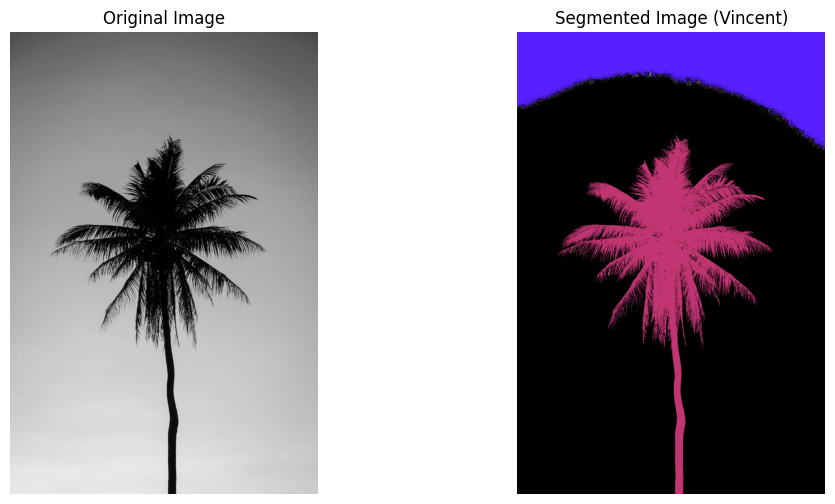

Segmented image saved as 'segmented_image_vincent.jpg'.


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Load the image in grayscale (replace 'image.jpg' with the actual uploaded file name)
image_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file name.")
else:
    print("Image loaded successfully.")

    # Step 2: Apply Otsu's thresholding to create a binary image
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the binary image (if necessary)
    binary_image = cv2.bitwise_not(binary_image)

    # Use connected components to label the image
    num_labels, labels_im = cv2.connectedComponents(binary_image)

    # Create an output image to visualize the segments
    output_image = np.zeros((labels_im.shape[0], labels_im.shape[1], 3), dtype=np.uint8)

    # Assign a random color to each label
    for label in range(1, num_labels):
        mask = (labels_im == label)
        output_image[mask] = np.random.randint(0, 255, size=3)

    # Step 3: Display the original and segmented images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Segmented Image (Vincent)')
    plt.imshow(output_image)
    plt.axis('off')

    plt.show()

    # Optionally, save the segmented image
    cv2.imwrite('segmented_image_vincent.jpg', output_image)
    print("Segmented image saved as 'segmented_image_vincent.jpg'.")